<a href="https://colab.research.google.com/github/dixonp91/TensorFlow-CNN-classification-challenge-project/blob/main/cnn_covid_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codecademy CNN Classification Challenge Project:
####Covid-19 and Pneumonia Classification with Deep Learning

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

### Upload Images 
Construct an ImageDataGenerator object

example of how to upload image datasets
https://www.youtube.com/watch?v=n4mxwSAWvo8
https://medium.com/analytics-vidhya/create-tensorflow-image-classification-model-with-your-own-dataset-in-google-colab-63e9d7853a3e

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
training_directory = str('/content/drive/My Drive/Covid19-dataset/train')
test_directory = str('/content/drive/My Drive/Covid19-dataset/test')

##Preprocess Image Data

In [5]:
BATCH_SIZE = 32

training_data_gen = ImageDataGenerator(rescale= 1/256, zoom_range = 0.2, rotation_range = 15, width_shift_range = 0.05, height_shift_range = 0.05)
training_iterator = training_data_gen.flow_from_directory(training_directory, class_mode = 'categorical', color_mode = 'grayscale', target_size = (256, 256), batch_size =BATCH_SIZE)

validation_data_gen = ImageDataGenerator(rescale= 1/256,)
validation_iterator = validation_data_gen.flow_from_directory(test_directory, class_mode='categorical', color_mode='grayscale', batch_size=BATCH_SIZE)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##Build Model

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (265,265,1)))

model.add(tf.keras.layers.Conv2D(5, 5, strides = 2, padding = 'valid', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(3,3), strides = (3,3)))
model.add(layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(3, 3, strides = 1, padding = 'valid', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2)))
model.add(layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(9, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]

model.compile( optimizer = opt, loss = loss, metrics = metrics)
model.summary()

history = model.fit(
       training_iterator,
       steps_per_epoch=training_iterator.samples/BATCH_SIZE,
       epochs=8,
       validation_data=validation_iterator,
       validation_steps=validation_iterator.samples/BATCH_SIZE)



Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 131, 131, 5)       130       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 43, 43, 5)         0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 43, 43, 5)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 41, 41, 3)         138       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1200)            

##Plots

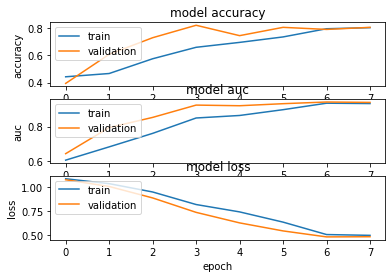

In [44]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(history.history['auc_22'])
ax2.plot(history.history['val_auc_22'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

# plotting loss and validation loss over epochs
ax2 = fig.add_subplot(3, 1, 3)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()